In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 🎨 Style setup for Grand Visualization
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [5]:
# 🔍 Step 3: Explore the Dataset
print(df.head())
print("\nDataset shape:", df.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset shape: (200, 5)


In [6]:
# 🧼 Step 4: Preprocess the Data
X = df.iloc[:, [2, 3, 4]]  # Selecting Age, Annual Income, and Spending Score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


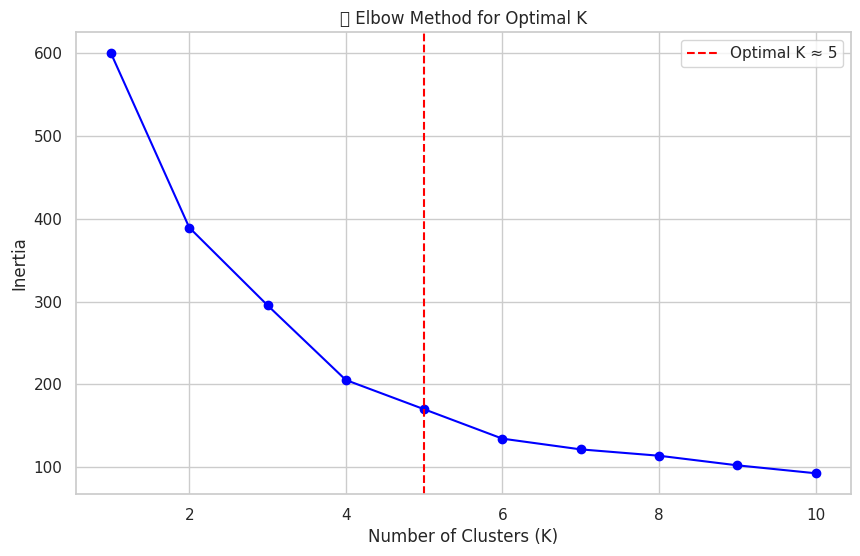

In [8]:
# 📉 Step 5: Elbow Method to find Optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# 💡 Elbow Plot
plt.plot(k_range, inertia, 'o-', color='blue')
plt.title('📈 Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.axvline(x=5, color='red', linestyle='--', label='Optimal K ≈ 5')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 🤖 Step 6: Apply K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [10]:
# 🧩 Step 7: Add Cluster Labels to Dataset
df['Cluster'] = cluster_labels

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


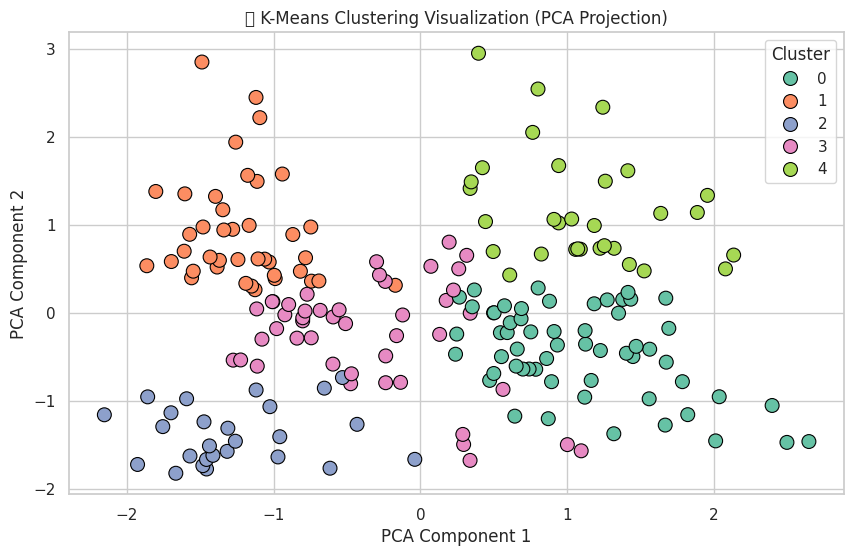

In [12]:
# 🌈 Step 8: 2D PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, edgecolor='black')
plt.title('🎨 K-Means Clustering Visualization (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [13]:
# 📊 Step 9: Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print(f'📏 Silhouette Score: {score:.2f}')

📏 Silhouette Score: 0.41


In [14]:
# 🗂️ Step 10: Cluster Summary
summary = df.groupby('Cluster').agg({
    'Age': ['mean'],
    'Annual Income (k$)': ['mean'],
    'Spending Score (1-100)': ['mean'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print("\n📊 Cluster Summary:\n", summary)


📊 Cluster Summary:
                Age Annual Income (k$) Spending Score (1-100) Count
              mean               mean                   mean count
Cluster                                                           
0        55.275862          47.620690              41.706897    58
1        32.875000          86.100000              81.525000    40
2        25.769231          26.115385              74.846154    26
3        26.733333          54.311111              40.911111    45
4        44.387097          89.774194              18.483871    31
